In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

books_path = "/Users/anjali/Downloads/books_data-2/books.csv"
ratings_path = "/Users/anjali/Downloads/books_data-2/ratings.csv"
users_path = "/Users/anjali/Downloads/books_data-2/users.csv"

books_df = pd.read_csv(books_path, sep=";", on_bad_lines='skip', encoding="latin-1", low_memory=False)
ratings_df = pd.read_csv(ratings_path, sep=";", on_bad_lines='skip', encoding="latin-1", low_memory=False)
users_df = pd.read_csv(users_path, sep=";", on_bad_lines='skip', encoding="latin-1", low_memory=False)

print(books_df.head())
print(ratings_df.head())
print(users_df.head())

         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/

In [63]:
ratings_books = pd.merge(ratings_df, books_df[['ISBN', 'Book-Title']], on='ISBN', how='inner')
ratings_books_users = pd.merge(ratings_books, users_df[['User-ID', 'Age']], on='User-ID', how='inner')
ratings_books_users = ratings_books_users[(ratings_books_users['Age'].notnull()) & (ratings_books_users['Age'] > 0) & (ratings_books_users['Age'] <= 100)]

In [64]:
bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
ratings_books_users['AgeGroup'] = pd.cut(ratings_books_users['Age'], bins=bins, labels=labels)

In [85]:
top_books = ratings_books_users['Book-Title'].value_counts().nlargest(25).index.tolist()
filtered_df = ratings_books_users[ratings_books_users['Book-Title'].isin(top_books)]


In [86]:
heatmap_data = filtered_df.pivot_table(
    index='Book-Title',
    columns='AgeGroup',
    values='Book-Rating',
    aggfunc='count'
).fillna(0)


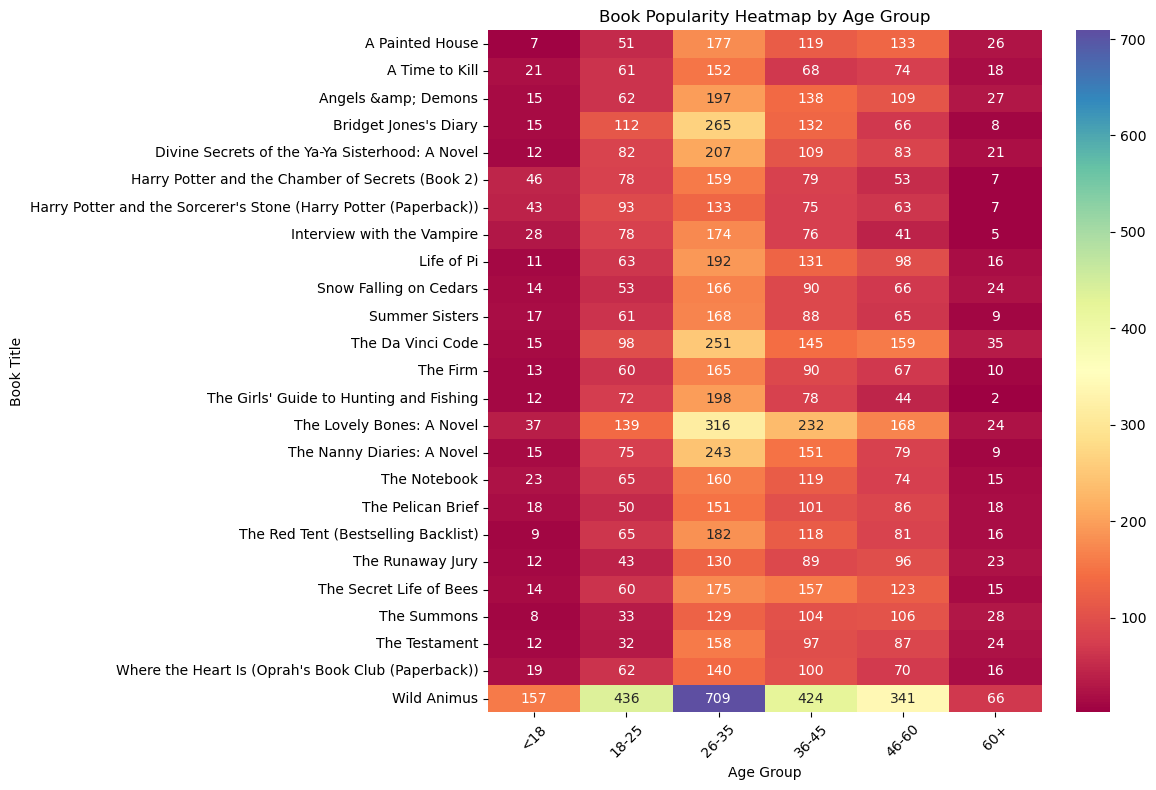

In [87]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="Spectral")
plt.title("Book Popularity Heatmap by Age Group")
plt.ylabel("Book Title")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [68]:
print(books_df.head())

         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/

In [69]:
print(users_df.columns)

Index(['User-ID', 'Location', 'Age'], dtype='object')


In [70]:
users_df['Age'] = pd.to_numeric(users_df['Age'], errors='coerce')
bins = [0, 18, 30, 40, 50, 60, 100]  # Define the age group boundaries
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']  # Labels for each group
users_df['Age_Group'] = pd.cut(users_df['Age'], bins=bins, labels=labels, right=False)
print(users_df[['User-ID', 'Age', 'Age_Group']].head())

   User-ID   Age Age_Group
0        1   NaN       NaN
1        2  18.0     19-30
2        3   NaN       NaN
3        4  17.0      0-18
4        5   NaN       NaN


In [71]:
users_df = users_df.dropna(subset=['Age'])
users_df.loc[:, 'Age_Group'] = pd.cut(users_df['Age'], bins=bins, labels=labels, right=False)
print(users_df[['User-ID', 'Age', 'Age_Group']].head())

    User-ID   Age Age_Group
1         2  18.0     19-30
3         4  17.0      0-18
5         6  61.0       60+
9        10  26.0     19-30
10       11  14.0      0-18


In [72]:
ratings_books_df = pd.merge(ratings_df, books_df[['ISBN', 'Book-Title', 'Book-Author']], on="ISBN", how="inner")
full_df = pd.merge(ratings_books_df, users_df[['User-ID', 'Age_Group']], on="User-ID", how="inner")
print(full_df[['User-ID', 'Book-Title', 'Book-Author', 'Age_Group']].head())

   User-ID                                        Book-Title  \
0     2313                              Flesh Tones: A Novel   
1     2313     Ender's Game (Ender Wiggins Saga (Paperback))   
2     2313             In Cold Blood (Vintage International)   
3     2313  Divine Secrets of the Ya-Ya Sisterhood : A Novel   
4     2313                            The Mistress of Spices   

                  Book-Author Age_Group  
0                  M. J. Rose     19-30  
1            Orson Scott Card     19-30  
2               TRUMAN CAPOTE     19-30  
3               Rebecca Wells     19-30  
4  Chitra Banerjee Divakaruni     19-30  


In [73]:
grouped_data = full_df.groupby(['Book-Author', 'Age_Group']).size().reset_index(name='Count')
grouped_data = grouped_data[grouped_data['Count'] > 0]
print(grouped_data.head())

                         Book-Author Age_Group  Count
1                           D. Chiel     19-30      3
2                           D. Chiel     31-40      1
7                        Mimma Balia     19-30      1
14                           'N Sync     31-40      1
21  142 moms from all over the world     41-50      1


In [74]:
print(grouped_data.isna().sum())

Book-Author    0
Age_Group      0
Count          0
dtype: int64


In [75]:
grouped_data['Count'] = pd.to_numeric(grouped_data['Count'], errors='coerce')

In [76]:
grouped_data = grouped_data[grouped_data['Count'] > 0]

In [77]:
print(grouped_data.head())

                         Book-Author Age_Group  Count
1                           D. Chiel     19-30      3
2                           D. Chiel     31-40      1
7                        Mimma Balia     19-30      1
14                           'N Sync     31-40      1
21  142 moms from all over the world     41-50      1


In [78]:
print(grouped_data.head(1000))

                           Book-Author Age_Group  Count
1                             D. Chiel     19-30      3
2                             D. Chiel     31-40      1
7                          Mimma Balia     19-30      1
14                             'N Sync     31-40      1
21    142 moms from all over the world     41-50      1
...                                ...       ...    ...
3077                    ANNE MCCAFFREY       60+      2
3079             ANNE MORROW LINDBERGH     19-30      3
3081             ANNE MORROW LINDBERGH     41-50      3
3082             ANNE MORROW LINDBERGH     51-60      2
3087                       ANNE NELSON     41-50      1

[1000 rows x 3 columns]


In [79]:
grouped_data = grouped_data[grouped_data['Count'] > 0]
grouped_data['Count'] = pd.to_numeric(grouped_data['Count'], errors='coerce')
grouped_data = grouped_data.dropna(subset=['Count'])

In [80]:
print(grouped_data['Book-Author'].nunique())
print(grouped_data['Age_Group'].nunique())

87070
6


In [81]:
top_authors = grouped_data.groupby('Book-Author')['Count'].sum().nlargest(25).index
top_authors_data = grouped_data[grouped_data['Book-Author'].isin(top_authors)]
print(top_authors_data.head())

          Book-Author Age_Group  Count
5616  Agatha Christie      0-18     68
5617  Agatha Christie     19-30    509
5618  Agatha Christie     31-40    562
5619  Agatha Christie     41-50    318
5620  Agatha Christie     51-60    247


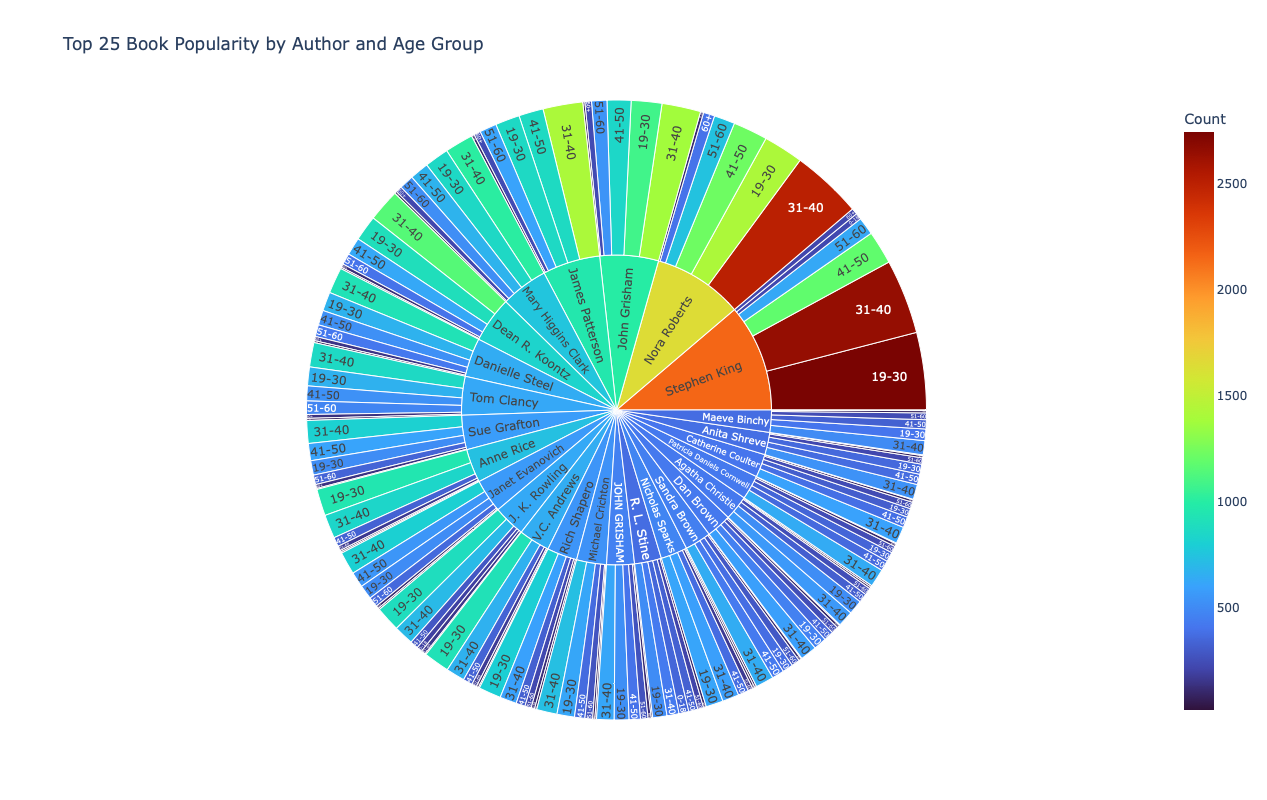

In [83]:
import plotly.express as px

fig = px.sunburst(top_authors_data, 
                  path=['Book-Author', 'Age_Group'],  
                  values='Count',  
                  title="Top 25 Book Popularity by Author and Age Group",  
                  color='Count',  
                  color_continuous_scale='Turbo',  
                  width=1000, 
                  height=800) 

fig.show()

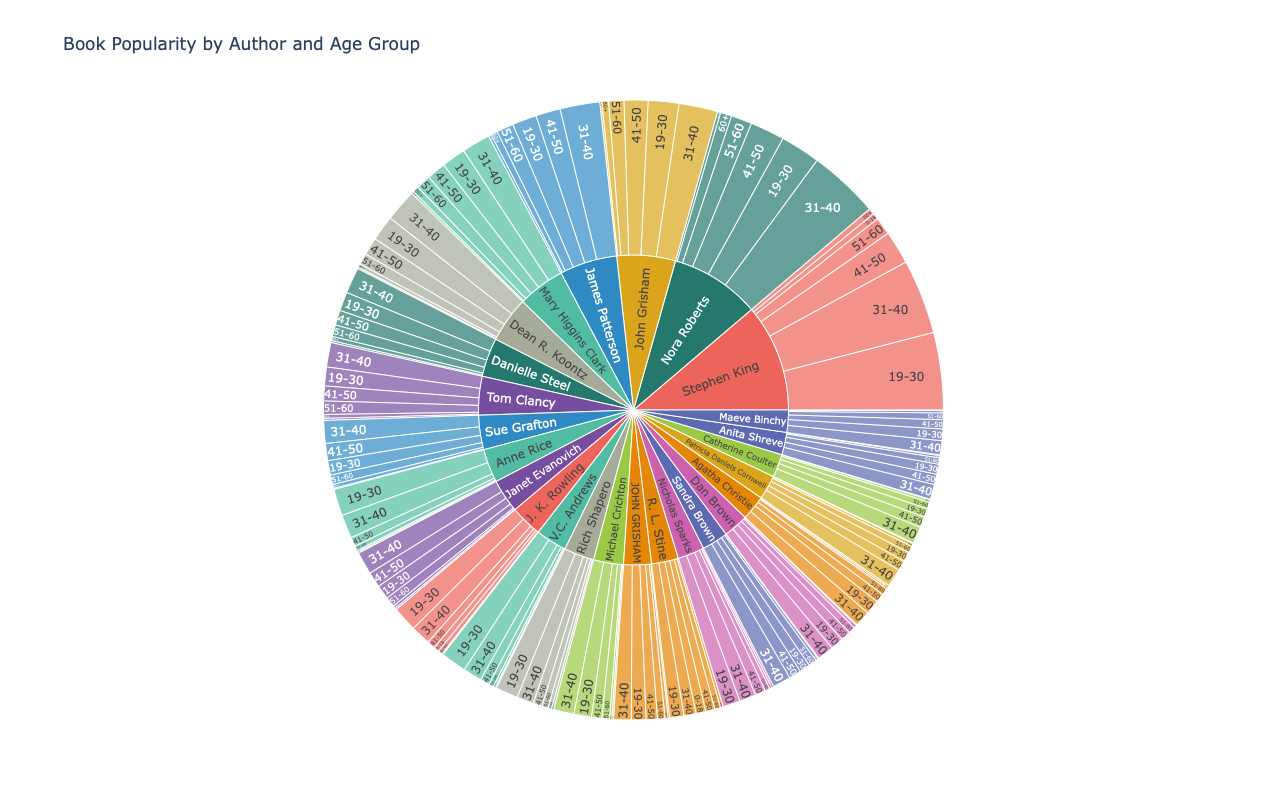

In [84]:
import plotly.colors as pc

discrete_colors = pc.qualitative.Vivid  

fig = px.sunburst(
    top_authors_data,
    path=['Book-Author', 'Age_Group'],
    values='Count',
    color='Book-Author',
    color_discrete_sequence=discrete_colors,
    title="Book Popularity by Author and Age Group",
    width=1000,
    height=800
)

fig.show()